<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [6]:
df = pd.read_csv(sac_csv)

In [7]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

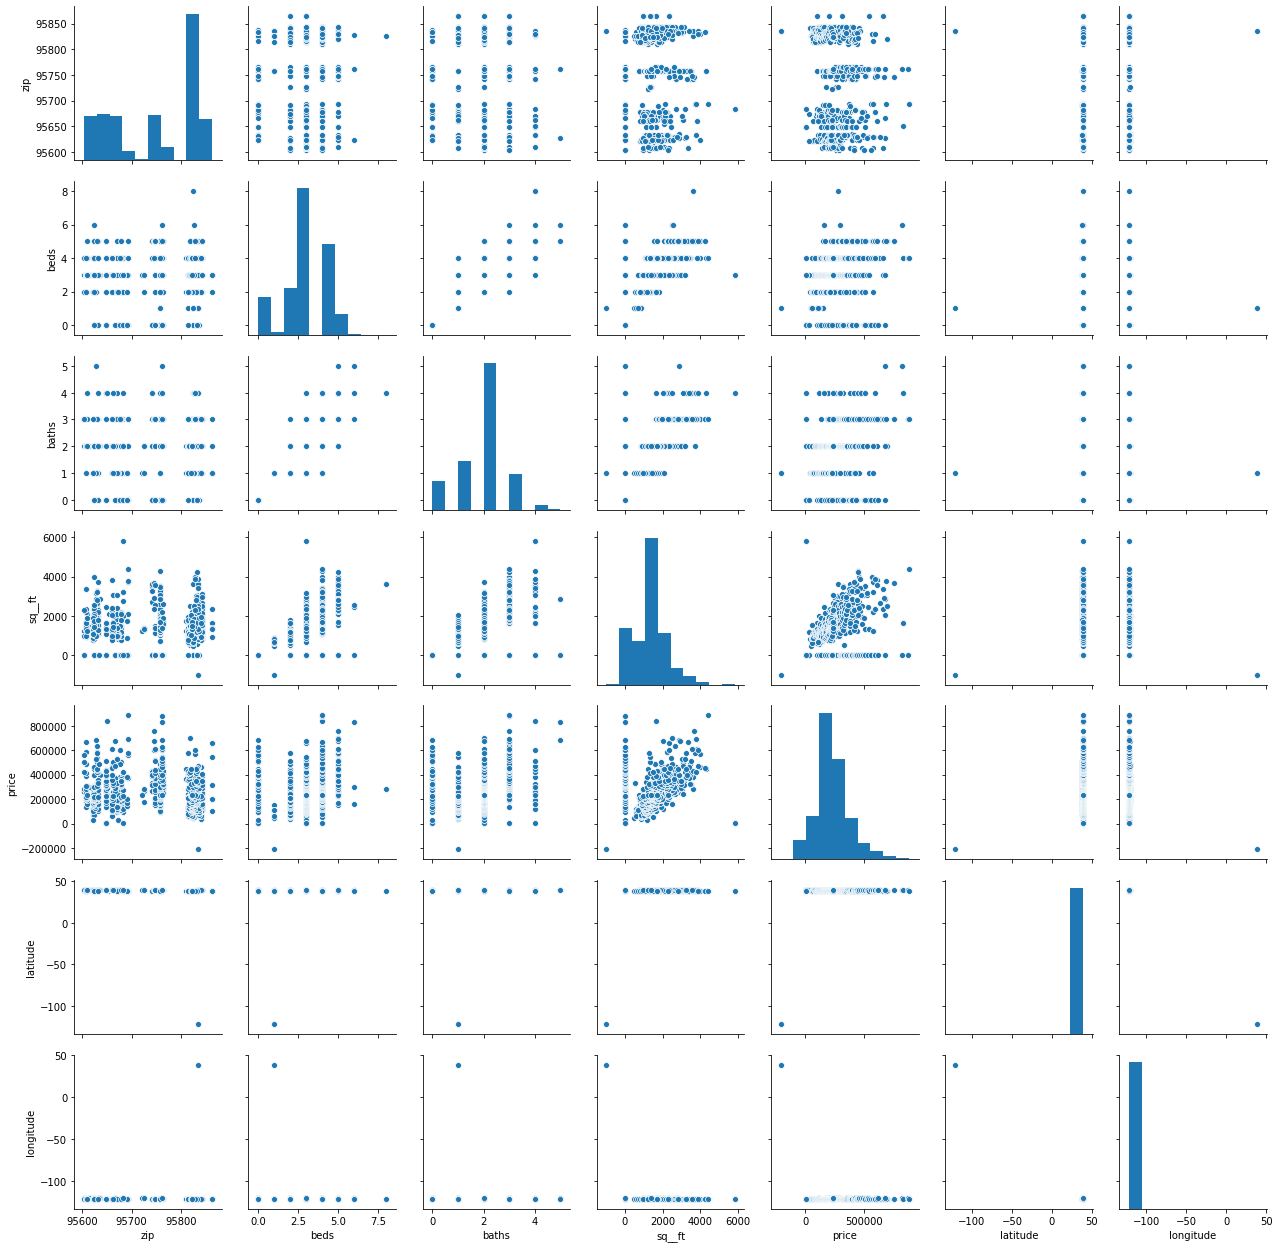

In [12]:
sns.pairplot(df)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

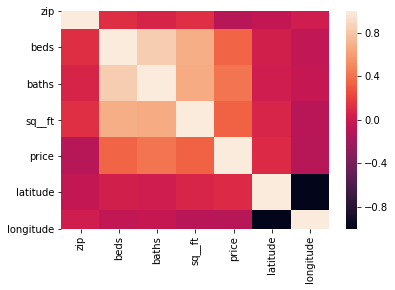

In [15]:
sns.heatmap(df.corr())

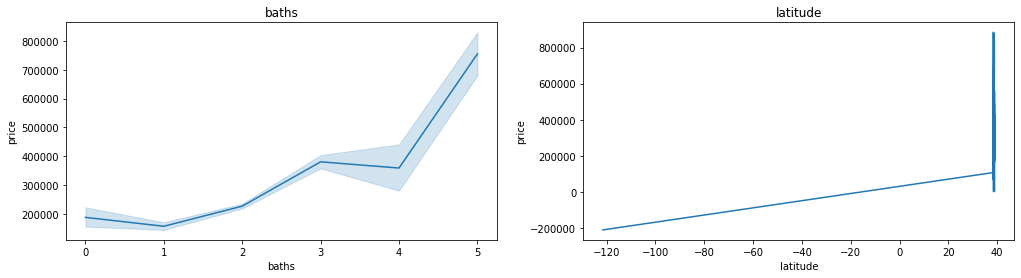

In [72]:
# A
fig, axs = plt.subplots(ncols = 2, figsize = (17, 4))

axs[0].set_title('baths')
sns.lineplot(x = df['baths'],
           y = df['price'], ax = axs[0])

axs[1].set_title('latitude')
sns.lineplot(x = df['latitude'],
           y = df['price'], ax = axs[1])

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:
Not clear

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [77]:
# A:
def model_training(df, x, y): 
    
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error as mse
    
    X = df[x]
    y = df[y]
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    y_pred = lr.predict(X)
    
    print("rmse: ", np.sqrt(mse(y, y_pred)))
    print("coef: ", lr.coef_)
    print("intercept: ", lr.intercept_)

In [78]:
model_training(df, ['zip', 'baths'], 'price')

rmse:  125171.25089655467
coef:  [ -204.6755842  66080.58514683]
intercept:  19714143.836942032


### 6. Interpret the intercept. Interpret the slope.

# A:
for every increase in zipcode, the price goes down; for every increase in baths, price goes up


### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [79]:
# A:
def model_training(df, x, y): 
    
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error as mse
    
    X = df[x]
    y = df[y]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    #print(np.sqrt(mse(y_test, y_pred)))
    #print(lr.coef_)
    #print(lr.intercept_)

    #Plot Our Actual and Predicted Values
    plt.plot(X_test, y_test, 'o', color='black');
    plt.plot(X_test, y_pred, color='blue')
    plt.title("Actuals vs Regression Line")

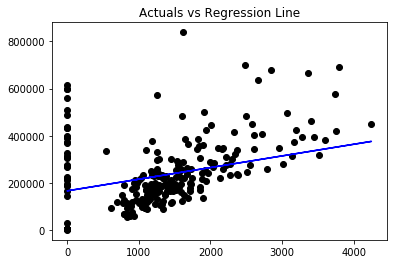

In [82]:
model_training(df, ['sq__ft'], 'price')